In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('kaggle_diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [3]:
# Exploring the Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [5]:
df.shape

(2000, 9)

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [7]:
# Visualizing the Data

/home/jimbrootan/anaconda3/envs/pythonds/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    65.8
1    34.2
Name: Outcome, dtype: float64

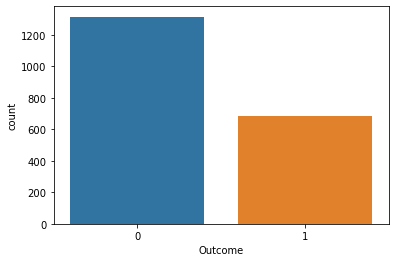

In [10]:
sns.countplot(df['Outcome']) 
df['Outcome'].value_counts(1)*100

In [11]:
# Correlation b/w Features

In [12]:
corr_matrix = abs(df.corr())
print(corr_matrix["Outcome"].sort_values(ascending=False))

Outcome                     1.000000
Glucose                     0.458421
BMI                         0.276726
Age                         0.236509
Pregnancies                 0.224437
DiabetesPedigreeFunction    0.155459
Insulin                     0.120924
SkinThickness               0.076040
BloodPressure               0.075958
Name: Outcome, dtype: float64


<AxesSubplot:>

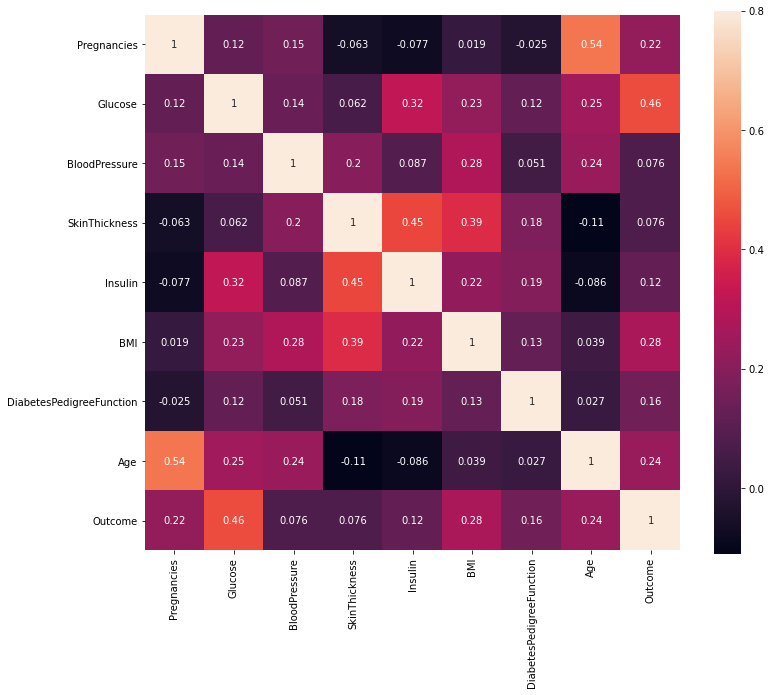

In [13]:
corr =df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, vmax=.8, square=True,annot=True) 

In [ ]:
# Feature Engineering 

In [14]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:>

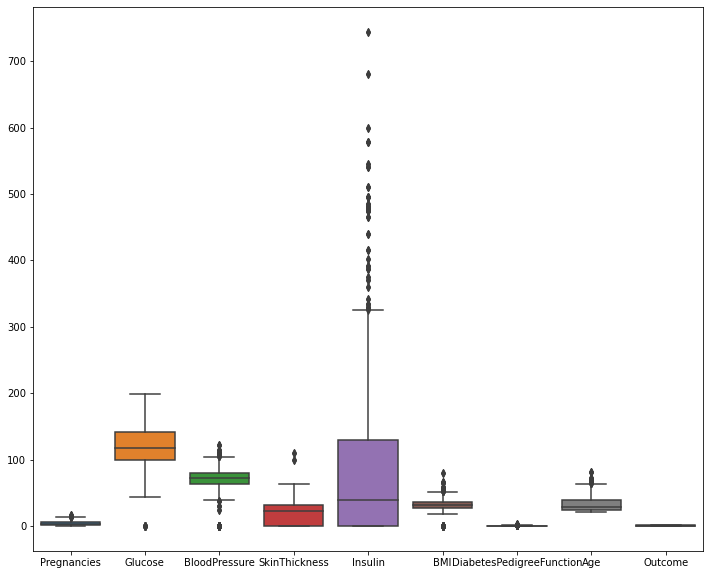

In [15]:
plt.figure(figsize=(12,10))
sns.boxplot(data=df)

In [17]:
df.Insulin.value_counts().head()

0      956
105     31
140     24
180     23
130     22
Name: Insulin, dtype: int64

In [ ]:
# Applying Classification Techniques

In [18]:
X = df.drop('Outcome',axis=1)
y = df.Outcome

In [20]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,138,62,35,0,33.6,0.127,47
1,0,84,82,31,125,38.2,0.233,23
2,0,145,0,0,0,44.2,0.630,31
3,0,135,68,42,250,42.3,0.365,24
4,1,139,62,41,480,40.7,0.536,21


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.2, random_state =0)

In [22]:
from sklearn.metrics import classification_report

In [23]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier().fit(X_train,y_train)

In [24]:
y_pred = rfc.predict(X_test)

In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       272
           1       1.00      0.98      0.99       128

    accuracy                           0.99       400
   macro avg       1.00      0.99      0.99       400
weighted avg       1.00      0.99      0.99       400



In [26]:
train_score = rfc.score(X_train,y_train)
test_score = rfc.score(X_test,y_test)
print(train_score)
print(test_score)

1.0
0.995


In [27]:
# Making a Pickle File For Deployment

In [36]:
#dumb file
import pickle
#open a file to store data

file=open('random_Forest_Classifier_model.pkl','wb')
pickle.dump(rfc,file)

In [37]:
model = open("diabetic_model.pkl","rb")
model = pickle.load(model) 

FileNotFoundError: [Errno 2] No such file or directory: 'diabetic_model.pkl'

In [31]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,138,62,35,0,33.6,0.127,47
1,0,84,82,31,125,38.2,0.233,23
2,0,145,0,0,0,44.2,0.630,31
3,0,135,68,42,250,42.3,0.365,24
4,1,139,62,41,480,40.7,0.536,21


In [32]:
pred = rfc.predict([['2','138','62','35','0','33.6','0.127','47']])

In [33]:
if pred == 0:
    print('No diabetic')
elif pred ==1:
    print('Opps! , Diabetic Found')

Opps! , Diabetic Found
